In [1]:
# For files e data manipulations
from neuralNetwork import * 

import os                
import zipfile                
import shutil            
import glob         

#For math operations           
import time               
import random               
import math                


#For plot
from matplotlib import pyplot     

#For images operations
import cv2             
import pydicom          
# from google.colab.patches import cv2_imshow    
from PIL import Image     
from numpy import expand_dims  

#For Data augumentation  
import keras     
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,img_to_array

In [2]:
data_entry = pd.read_csv("C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/Data_Entry_2017.csv")
data_entry

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [3]:
data_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  float64
 11  Unnamed: 11                  0 non-null       float64
dtypes: float64(3), int64(5), object(4)
memory usage: 10.3+ MB


In [4]:
labels = list(data_entry['Finding Labels'].unique())
print(f'Neste dataset temos: {len(labels)} labels\n\n\n\n')
category_counts = data_entry['Finding Labels'].value_counts()
print(category_counts)

Neste dataset temos: 836 labels




Finding Labels
No Finding                                                         60361
Infiltration                                                        9547
Atelectasis                                                         4215
Effusion                                                            3955
Nodule                                                              2705
                                                                   ...  
Atelectasis|Consolidation|Edema|Effusion|Infiltration|Pneumonia        1
Atelectasis|Consolidation|Effusion|Emphysema|Mass|Pneumothorax         1
Cardiomegaly|Effusion|Pleural_Thickening|Pneumothorax                  1
Edema|Infiltration|Pneumothorax                                        1
Atelectasis|Consolidation|Mass|Pleural_Thickening|Pneumothorax         1
Name: count, Length: 836, dtype: int64


In [5]:
category_counts.to_csv('label_quantidade.csv')

In [6]:
valid_labels = ['No Finding', 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

# Filter the DataFrame to keep only rows with valid labels
filtered_df = data_entry[data_entry['Finding Labels'].isin(valid_labels)]
filtered_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
13,00000005_000.png,No Finding,0,5,69,F,PA,2048,2500,0.168,0.168,NaN
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,NaN
15,00000005_002.png,No Finding,2,5,69,F,AP,2500,2048,0.168,0.168,NaN


In [7]:
qnt_labels = filtered_df['Finding Labels'].value_counts()
qnt_labels

Finding Labels
No Finding      60361
Infiltration     9547
Atelectasis      4215
Effusion         3955
Nodule           2705
Pneumothorax     2194
Mass             2139
Cardiomegaly     1093
Pneumonia         322
Name: count, dtype: int64

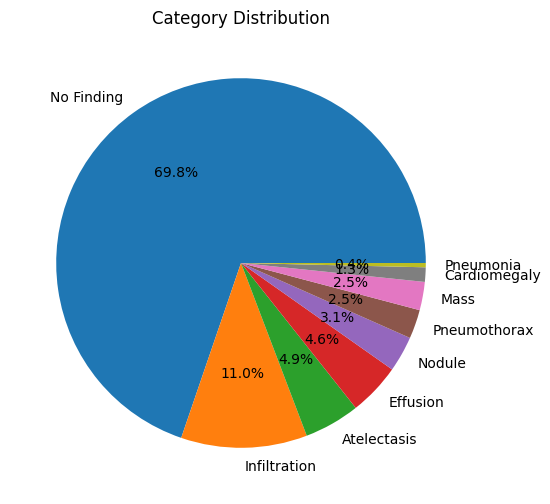

In [8]:
# Count the occurrences of each category
category_counts = filtered_df['Finding Labels'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

Obs.: É interessante testar com o dataset balanceado também.

In [9]:
columns_to_eliminate = [1,2,4,5,6,7,8,9,10,11]  # Eliminate the second column (column at index 1)

# Eliminate columns based on their column number
filter_df = filtered_df.drop(filtered_df.columns[columns_to_eliminate], axis=1)
filter_df.head(6)

,Image Index,Patient ID
0,00000001_000.png,1
3,00000002_000.png,2
13,00000005_000.png,5
14,00000005_001.png,5
15,00000005_002.png,5
16,00000005_003.png,5


In [10]:
num_images = len(filter_df)
num_train=int(num_images*0.9)
num_test=int(num_images*0.05)
num_dev=int(num_images*0.05)

print(f'Quantidade de imagens para treino    é  {num_train} imagens')
print(f'Quantidade de imagens para validação é  {num_test} imagens')
print(f'Quantidade de imagens para teste     é  {num_dev} imagens')

Quantidade de imagens para treino    é  77877 imagens
Quantidade de imagens para validação é  4326 imagens
Quantidade de imagens para teste     é  4326 imagens


In [24]:
source_folder = os.path.normpath('C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/images')

# Paths to the destination folders
train_folder = 'train'
test_folder = 'test'
validation_folder = 'validation'
flag = False

# Check if the destination folders already exist, and create them if not
for folder in [train_folder, test_folder, validation_folder]:
    destination = os.path.join('C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/', folder)
    if not os.path.exists(destination):
        os.mkdir(destination)
    else:
        print(f"Folder '{folder}' already exists. Skipping creation.")
        
# Get a list of file names in the source folder
file_names = list(filter_df['Image Index'])

# Shuffle the list to ensure randomness
random.shuffle(file_names)

# Set the proportion of images for each folder
train_proportion = 0.9
test_proportion = 0.05
validation_proportion = 0.05

# Calculate the number of images for each folder
total_images = len(file_names)
num_train = int(total_images * train_proportion)
num_test = int(total_images * test_proportion)
num_validation = total_images - num_train - num_test

flag = True
if len(os.listdir('C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/train'))== 0:
    flag = False

# Move the images to the corresponding folders
for i, file_name in enumerate(file_names):
    source = os.path.normpath(os.path.join(source_folder, file_name))
    if flag: break
    if i < num_train:
        destination = os.path.normpath(os.path.join('C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/', train_folder, file_name))
    elif i < num_train + num_test:
        destination = os.path.normpath(os.path.join('C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/', test_folder, file_name))
    else:
        destination = os.path.normpath(os.path.join('C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/', validation_folder, file_name))
    
    # Use shutil.move to move the images
    shutil.move(source, destination)

print("Images moved successfully!")


Folder 'train' already exists. Skipping creation.
Folder 'test' already exists. Skipping creation.
Folder 'validation' already exists. Skipping creation.
Images moved successfully!


In [25]:
flag = True
if len(os.listdir('C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/train'))== 0:
    flag = False

flag

True

## Neural Network

In [26]:
pnn = PreNeuralNetwork(train='C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/train', test='C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/test' ,
                    valid='C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/validation')

In [27]:
dir_train = 'C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/train'
dir_test  = 'C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/test'
dir_valid = 'C:/Users/Lucas/Documents/PIBIC/DATASET/NIH-CHEST/archive/validation'

batch_size = 32  
img_height = 224 
img_width  = 224
channel = 3

In [28]:
train_datagen= ImageDataGenerator(rescale=1/255)
val_datagen  = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(dir_train,
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        class_mode='sparse',batch_size=batch_size)

val_generator=val_datagen.flow_from_directory( dir_valid,
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        class_mode='sparse',batch_size=batch_size)

test_gemerator=test_datagen.flow_from_directory(test_datagen,
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        class_mode='sparse',batch_size=batch_size)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


TypeError: listdir: path should be string, bytes, os.PathLike or None, not ImageDataGenerator